## Import required packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
test = pd.read_csv('data/Student_Performance.csv')

## EDA

In [3]:
print(test.info())
print(test.head())
print(test.shape)
print(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3           

In [4]:
Target_Feature="Performance Index"

## Preprocessing

In [5]:
test["Extracurricular Activities"].dtype 
test["Extracurricular Activities"] = test["Extracurricular Activities"].fillna('No')

In [6]:
activity_map = {'no': 0, 'yes': 1}

test["Extracurricular Activities"] = (
    test["Extracurricular Activities"]
        .str.strip()
        .str.lower()
        .map(activity_map)
)

test = test.fillna(test.median(numeric_only=True))
test = test.fillna('missing value')

In [7]:
X = test.drop(columns=[Target_Feature])
y = test[Target_Feature]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
#poly = PolynomialFeatures(degree=2, include_bias=False)

#X_train_poly = poly.fit_transform(X_train)
#X_test_poly = poly.transform(X_test)
#model = LinearRegression()
#model.fit(X_train_poly, y_train)
#y_pred = model.predict(X_test_poly)
for r in range(1,11):
    poly_model = Pipeline([
        ("poly", PolynomialFeatures(degree=r, include_bias=False)),
        ("linear", LinearRegression())
    ])

    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Polynomial Degree is: ",r)
    print("MSE:",mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("=======================")

Polynomial Degree is:  1
MSE: 4.082628398521857
RMSE: 2.0205515085050063
R2 Score: 0.9889832909573145
Polynomial Degree is:  2
MSE: 4.0806431061514665
RMSE: 2.020060173893705
R2 Score: 0.988988648140549
Polynomial Degree is:  3
MSE: 4.092151225569393
RMSE: 2.0229066279908703
R2 Score: 0.9889575942235915
Polynomial Degree is:  4
MSE: 4.123629786976977
RMSE: 2.0306722500140135
R2 Score: 0.9888726513587853
Polynomial Degree is:  5
MSE: 4.200628044117162
RMSE: 2.04954337453911
R2 Score: 0.9886648765350923
Polynomial Degree is:  6
MSE: 4.2249382747998485
RMSE: 2.0554654642683365
R2 Score: 0.9885992769477556
Polynomial Degree is:  7
MSE: 4.273218381203182
RMSE: 2.0671764272076976
R2 Score: 0.9884689961989646
Polynomial Degree is:  8
MSE: 4.322997010137779
RMSE: 2.0791818126700172
R2 Score: 0.98833467178391
Polynomial Degree is:  9
MSE: 4.472891637460281
RMSE: 2.1149211894206084
R2 Score: 0.987930190813545
Polynomial Degree is:  10
MSE: 5.223637870921164
RMSE: 2.285527919523444
R2 Score: 0.98

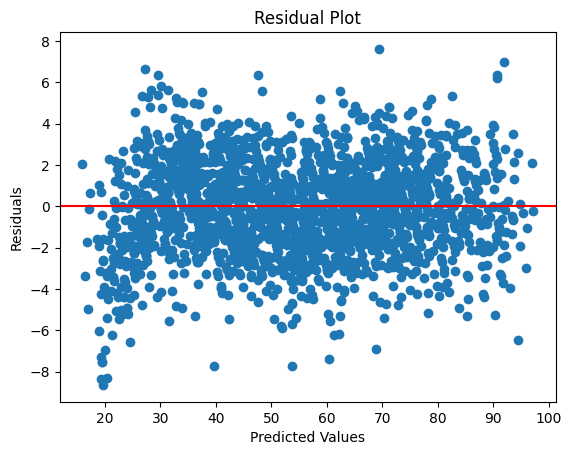

In [9]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = pd.DataFrame()
X_vif["Feature"] = X.columns
X_vif["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(X.shape[1])]

print(X_vif)


                            Feature        VIF
0                     Hours Studied   4.263244
1                   Previous Scores  10.088586
2        Extracurricular Activities   1.928235
3                       Sleep Hours   9.833594
4  Sample Question Papers Practiced   3.350481


In [11]:
print("Train R2:", poly_model.score(X_train, y_train))
print("Test R2:", poly_model.score(X_test, y_test))


Train R2: 0.9867844857264635
Test R2: 0.9859043505921021


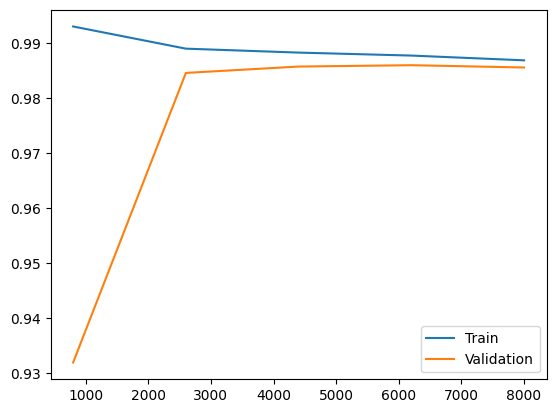

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    poly_model, X, y, cv=5, scoring="r2"
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.legend()
plt.show()